In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [78]:
df = pd.read_csv('sentiment_results_full.csv')

In [79]:
df = df[df['count'] > 50]

In [80]:
r_2020 = df[df['season'] == 2020]
r_2020 = r_2020.sort_values(by='comm_sentiment', ascending=False)

In [81]:
palette = dict(zip(r_2020.name, r_2020.returned))

green = '#49ab81'
red = '#ba605e'

for key, val in palette.items():
    if val == 0:
        palette[key] = red
    else:
        palette[key] = green

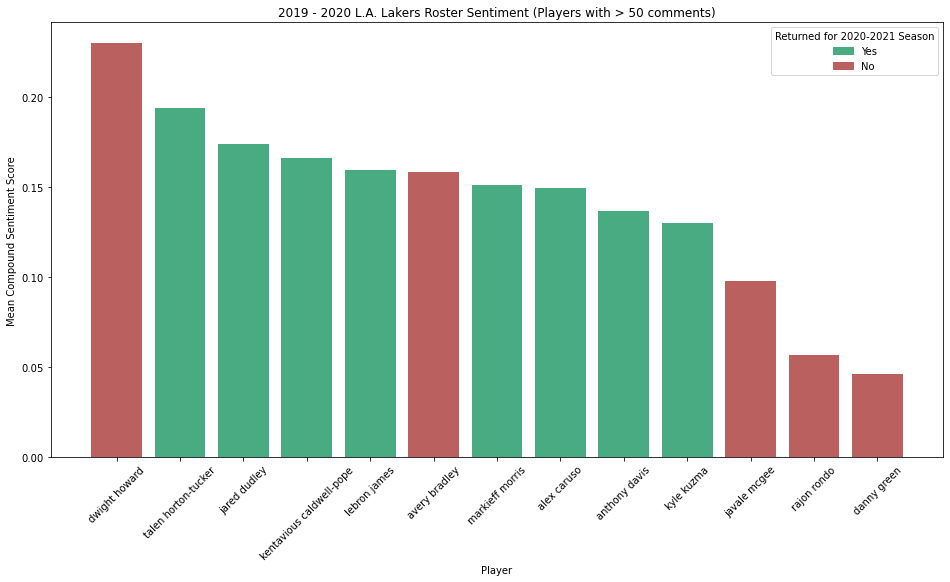

In [94]:
fig = plt.figure(figsize=(16,8))

plt.bar(r_2020['name'], r_2020['comm_sentiment'], color=r_2020['name'].map(palette))

red_patch = mpatches.Patch(color=red, label='No')
green_patch = mpatches.Patch(color=green, label='Yes')

plt.legend(title='Returned for 2020-2021 Season', handles=[green_patch, red_patch])
plt.xticks(rotation=45)
plt.xlabel('Player')
plt.ylabel('Mean Compound Sentiment Score')
plt.title('2019 - 2020 L.A. Lakers Roster Sentiment (Players with > 50 comments)')

plt.savefig('19_20_lakers_sentiment.png', dpi=300, bbox_inches = 'tight')